In [3]:
library(corrplot)

### Data

The UD GUM corpus, train + dev (https://corpling.uis.georgetown.edu/gum/download.html)

### Model

`bert-base-cased`

### Probing method

Correlational analysis of the activation patterns in the pooler output: embedding of the CLS token in the last layer of the BERT model fed into an additional two-layer MLP.

In [4]:
gum.all <- read.csv('../csv/mbert_vanilla_GUM_roots_ff_train_dev_11.csv', h = F)
dim(gum.all)

[1] 6507  768

In [6]:
gum.cor <- cor(gum.all, method='spearman')

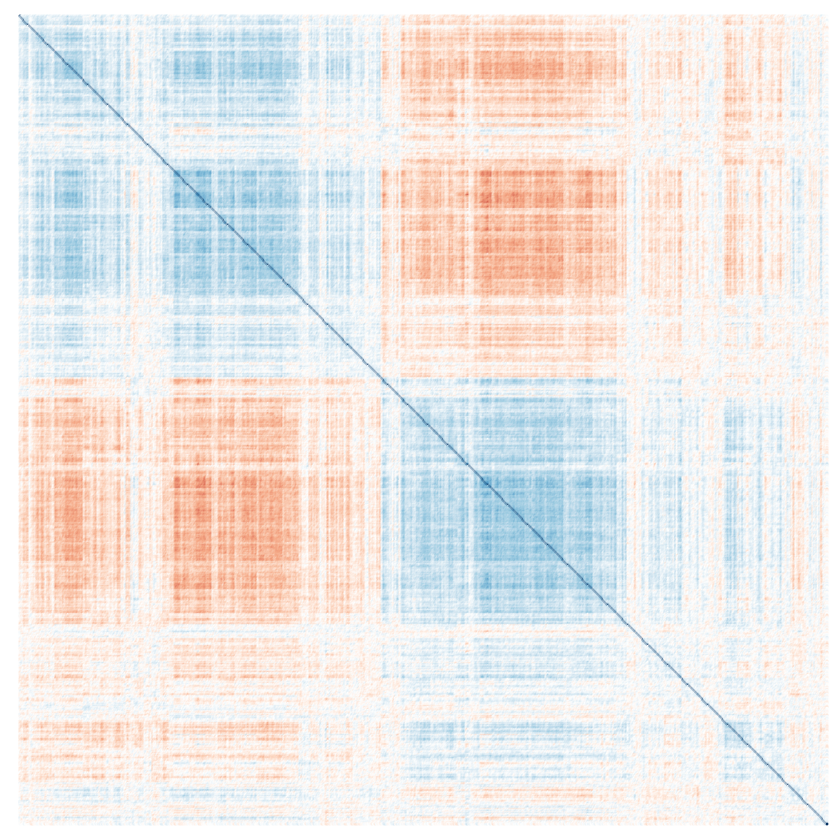

In [11]:
corrplot(gum.cor, method='color', order='hclust', cl.pos='n', tl.pos='n')

In [5]:
gum.sentences <- scan('GUM_sentences.txt', sep='\n', what='character')
length(gum.sentences)

[1] 6507

In [6]:
# We can what the activations in the pooler output
# correlate with in domain of lexicon, dependency relations,
# and individual lexical items.

gum.binary.deprel <- read.csv('GUM_binary_deprels.csv')
# Exclude the root, which is found everywhere
gum.binary.deprel <- gum.binary.deprel[, -which(colnames(gum.binary.deprel) == 'root')]
gum.binary.pos    <- read.csv('GUM_binary_POS.csv')
gum.binary.words  <- read.csv('GUM_binary_words.csv')

In [8]:
gum.pooler.cor.deprel <- cor(gum.all, gum.binary.deprel)
gum.pooler.cor.pos <- cor(gum.all, gum.binary.pos)
gum.pooler.cor.words <- cor(gum.all, gum.binary.words)

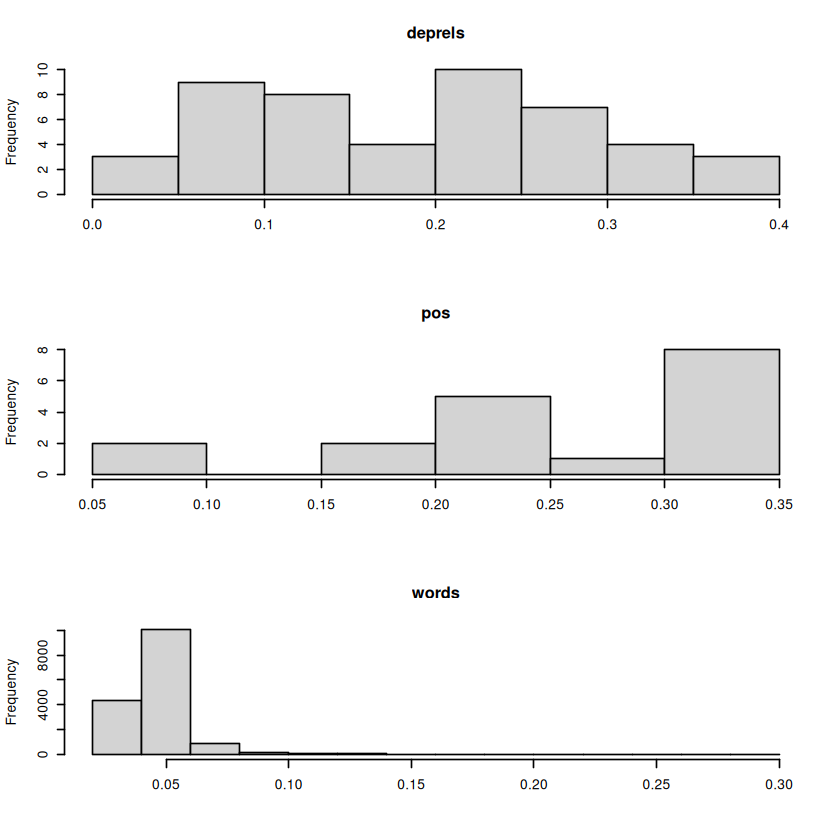

In [11]:
# Histogram of maximum (in absolute values) correlations
# for each deprel, POS, and word resp
par(mfrow=c(3,1))
hist(apply(abs(gum.pooler.cor.deprel), 2, max), xlab='', main='deprels')
hist(apply(abs(gum.pooler.cor.pos), 2, max), xlab='', main='pos')
hist(apply(abs(gum.pooler.cor.words), 2, max), xlab='', main='words')

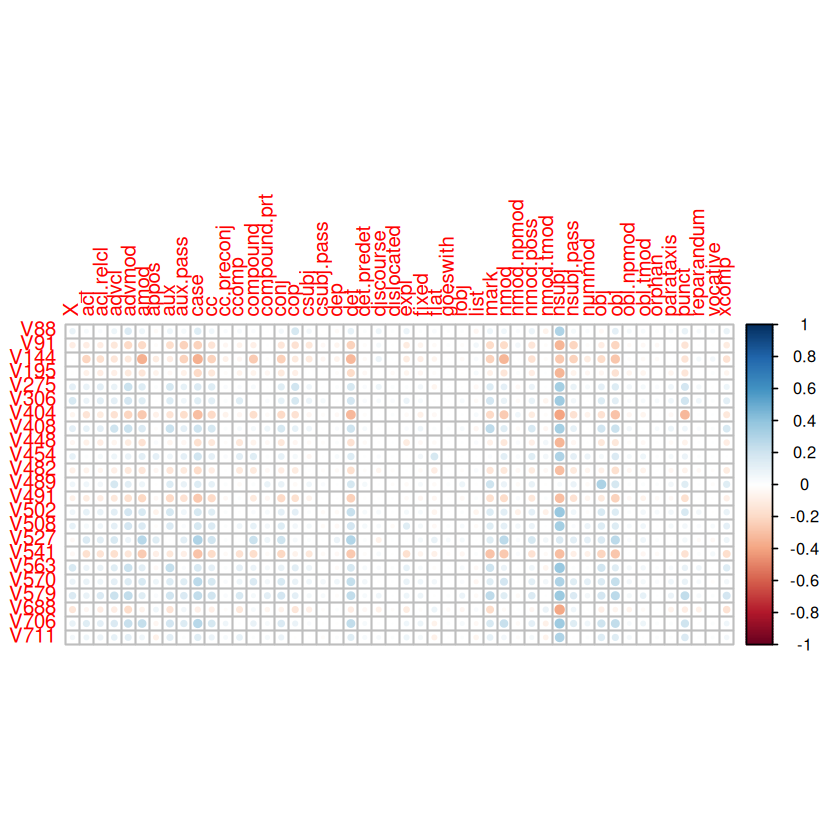

In [12]:
# Corrplots showing the strongest correlations between activations
# and different features of sentences
prominent.neurons.deprels <- which(apply(abs(gum.pooler.cor.deprel), 1, max) > 0.3)
corrplot(gum.pooler.cor.deprel[prominent.neurons.deprels,])

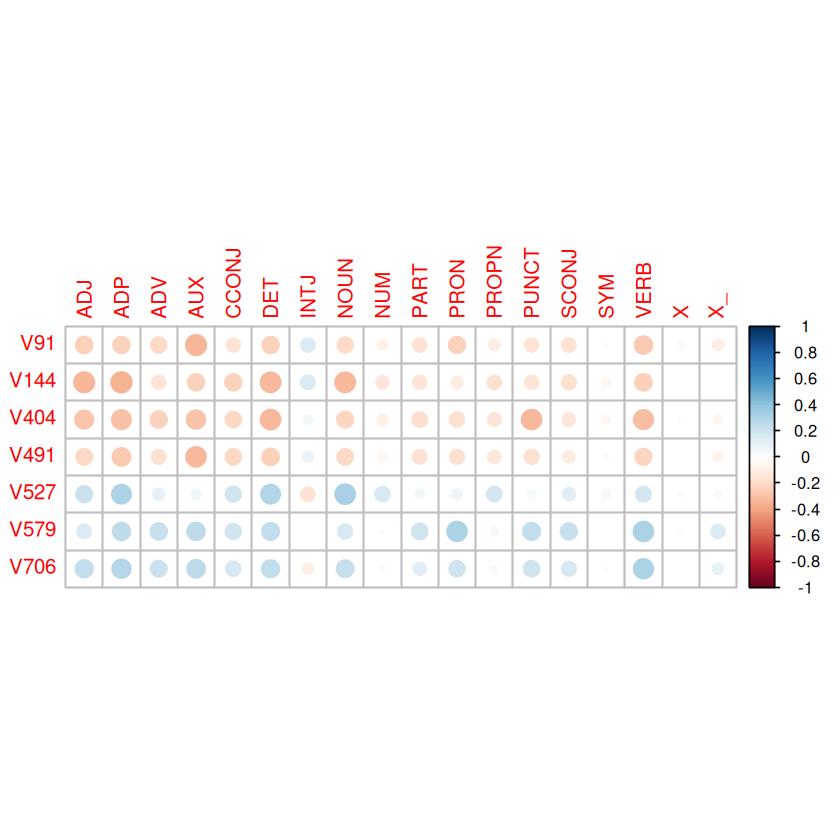

In [13]:
prominent.neurons.pos <- which(apply(abs(gum.pooler.cor.pos), 1, max) > 0.3)
corrplot(gum.pooler.cor.pos[prominent.neurons.pos,])

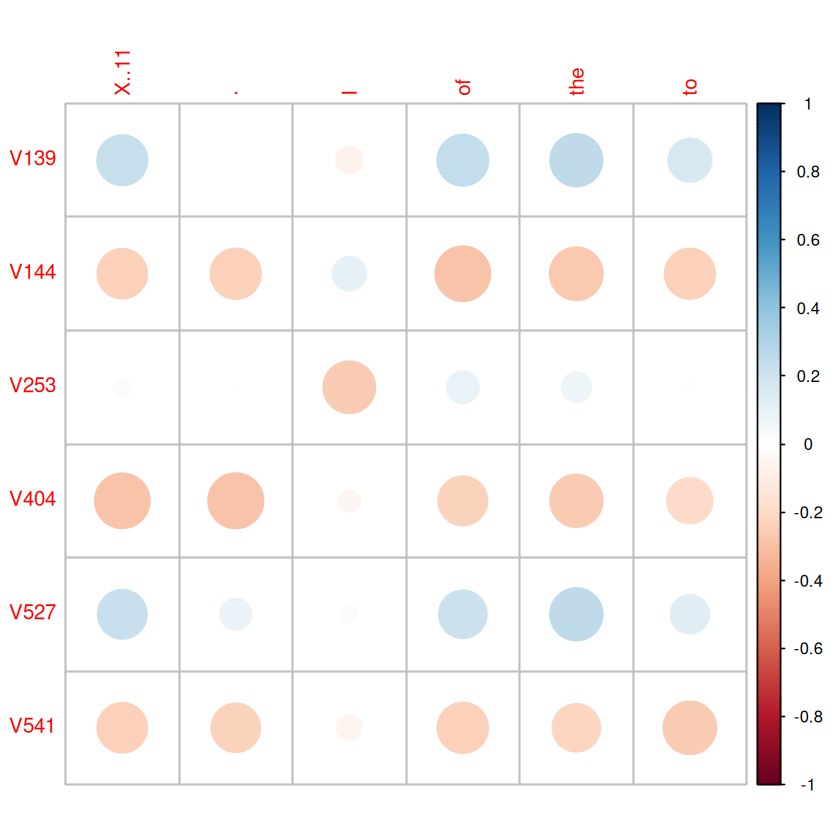

In [14]:
# Some neurons react to function words.
prominent.words <- which(apply(abs(gum.pooler.cor.words), 2, max) > 0.25)
prominent.neurons.words <- which(apply(abs(gum.pooler.cor.words[,prominent.words]), 1, max) > 0.25)
corrplot(gum.pooler.cor.words[prominent.neurons.words,prominent.words])

In [13]:
gum.pooler.pca <- prcomp(gum.all)

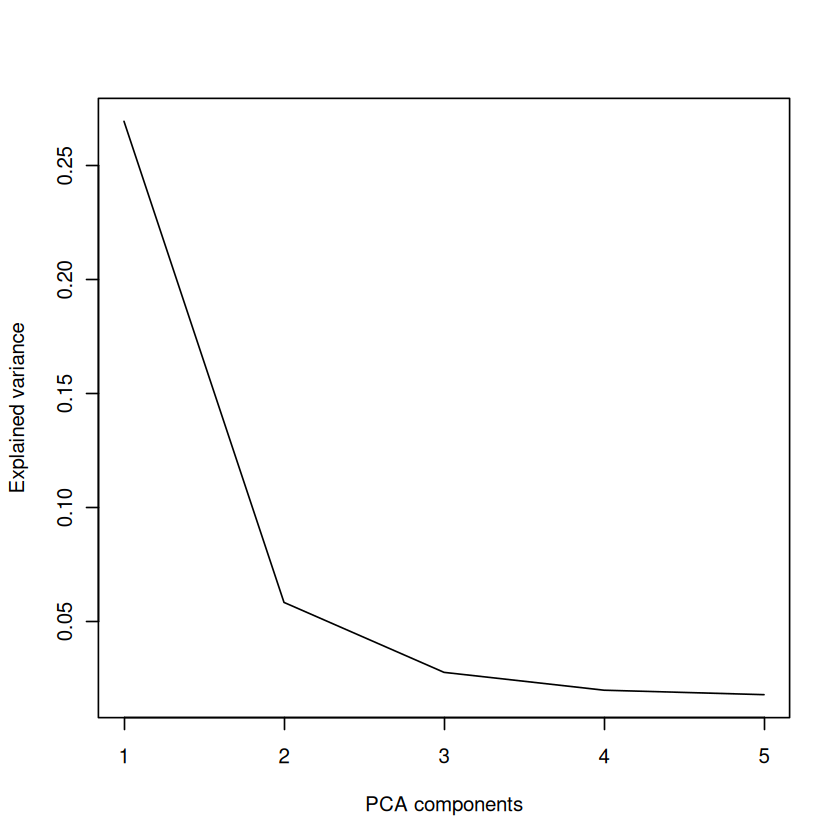

In [14]:
# Pooler activations are higly correlated:
# more than half of variation is contained inside
# a single component.
var_explained = gum.pooler.pca$sdev^2 / sum(gum.pooler.pca$sdev^2)
plot(var_explained[1:5] ~ seq_along(var_explained[1:5]), type='l', 
     xlab='PCA components',
     ylab='Explained variance')

In [16]:
var_explained[1]

[1] 0.2695557

In [15]:
sum(var_explained[1:3])

[1] 0.3558569

In [17]:
# What stands behind this? Let's extract sentences with biggest 
# and lowest activations for the first three components

In [18]:
show.sentences <- function(sentences) {
    for (s in sentences) {
        cat(s); cat('\n\n')
    }
}

### First principal component

Minimum values: ???

In [19]:
show.sentences(gum.sentences[head(sort(gum.pooler.pca$x[,1], index.return=T)$ix, n=20)])

Whatever the reasons behind the duel , Galois was so convinced of his impending death that he stayed up all night writing letters to his Republican friends and composing what would become his mathematical testament , the famous letter to Auguste Chevalier outlining his ideas , and three attached manuscripts . [ 22 ]

The protégé of Pope Damasus I , who died in December of 384 , Jerome was known for his teachings on Christian moral life , especially to those living in cosmopolitan centers such as Rome .

An ancient town and capital of Persia from 1598 to 1722 , it was long noted for its fine carpets and silver filigree .

A new study documenting iodine nutritional status in Australian school children has revealed many are not getting enough iodine - which can lead to mental and growth retardation .

The controversy surrounding Beall ’s decision indicates how difficult it is to make such judgments — even for professionals .

By the late 1980s and early 1990s , the city 's reality led to 

Maximum values: imperatives

In [20]:
show.sentences(gum.sentences[tail(sort(gum.pooler.pca$x[,1], index.return=T)$ix, n=20)])

Simmer the quinoa for about 15 minutes or until the grain becomes translucent and the white germ forms a visible spiral on the exterior of the quinoa grain .

Pour the liquid mixture into the flour mixture .

Allow me at this point to congratulate Mr. Soren Jessen-Petersen , Special Representative for Kosovo of the United Nations Secretary-General , in assuming this very important duty .

Suppose that moral realists assume that there is no relation between our moral judgments and the moral facts .

Expect impact .

Press gently down on its back , and gently move its legs back if it tries to stand up .

Exclaim that you 've lost a beast .

Clap your hands or give it a gentle shove until it jumps up and walks away .

Prepare the muffin tray by adding cupcake holders / cases .

Include items like toiletries , toilet paper , bottled water , snacks and a change of clothes in case you can not unpack everything in time .

Deploy .

Rinse off the leaves and use the basil to make pesto or a Cap

### Second principal component

Minimum values: incomplete sentences

In [21]:
show.sentences(gum.sentences[head(sort(gum.pooler.pca$x[,2], index.return=T)$ix, n=40)])

Um , that 's pretty well , like secure right there , so maybe —

Holt with the Boston Red Sox

A solid .

B. Cherokee

Solid .

Cold as ice : Wikinews interviews Marymegan Daly on unusual new sea anemone

The Plains of Arafat on the day of Hajj

A gas .

The headlines

First of all because it was beautiful .

It 's all like super separated .

Sixteen ?

“ Pretty ! ”

Expectations crushed ?

Local music ( ragga , zouk , rnb ) and local customers .

Mine was developmental .

Gas .

Re(a)d Wedding :

Two — hmm .

Ali Qapu Palace

Shah Mosque

A Russian stamp for Paralympic Games in Sochi in 2014

It 's like the most beautiful red lipstick .

Gordon 's alleged tomb at Vvedenskoye Cemetery in Moscow .

Belle

From the Southeast / Arkansas - The " Muskogee Turnpike . "

The Beast

Five swollen balloons .

Monday , March 27 , 2006

Architecture

Cities

Or water .

Okay so this is a Pat McGrath lipstick .

Loser .

Jenna Marbles

Monday , March 5 , 2007

Tuesday , September 1 , 2015

Pride an

Maximum values: ???

In [22]:
show.sentences(gum.sentences[tail(sort(gum.pooler.pca$x[,2], index.return=T)$ix, n=20)])

Such alternative ( and probably derived ) uses provide insight in possible paths of semantic change , but we exclude them here to make sure we are comparing like with like .

After your initial greeting and exchange of pleasantries , you 'll probably want to ask how the person 's doing ( just like you might in the real world ) .

Because elevator rides usually last less than a minute , make sure your pranks are quick and have a lot of punch .

Mr. President , I want our fellow citizens to know how much you did to carry on this tradition .

Just put marks over the letters or make up something right on the spot , you might have to take some time on this !

If you want to practice at home , make sure you 've got enough open space to move freely , preferably on a hard wood floor .

From a systematic comparison of 10 spoken languages from 5 continents we find evidence suggesting that a word like ‘ Huh ? ’ – used as a ‘ repair initiator ’ when , for example , one has not clearly heard what s

### Third principal component

Minimum values: show/promote/encourage

In [27]:
show.sentences(gum.sentences[head(sort(gum.pooler.pca$x[,3], index.return=T)$ix, n=15)])

In computer science , the Computing Research Association ( CRA ) documents trends in the employment of PhD recipients through the annual Taulbee survey of computing departments in North America ( cra.org/resources/taulbee-survey ) .

It emphasizes consumerism , the belief that success always goes to people who merit it due to their abilities , dedication and qualifications , and reinforces , rather than changes , existing ideas related to gender , ethnicity and nationality .

Mr Key promoted the campaign for a unique New Zealand flag on Waitangi Day - February 6 - this year .

Since 2007 the Andy Warhol Photographic Legacy Program has seeded university art galleries throughout the United States with over 28,000 Andy Warhol photographs and other artifacts .

Since the CFLs are the most commonly used light bulbs in the residential and has a great compatibility to LED in terms of design and materials , the proponents conducted a study about innovating and recycling CFL into a more efficie

Maximum values: exclamations

In [24]:
show.sentences(gum.sentences[tail(sort(gum.pooler.pca$x[,3], index.return=T)$ix, n=20)])

Like that 's definitely what I want .

That 's right .

What 's up ?

“ That ’s it !

That 's all I get ?

That 's about it .

“ I do n’t know how long we ’ll be . ”

But yeah that 's pretty much it , hope you guys do n't mind this kind of like random vlog that I 'm doing , but I just wanted to show you guys kind of loosely like how a week is and the life of a radiology resident .

Well , we 're gon na have to find somewhere , to get , something

Oh my gosh .

Oh my gosh .

Oh my gosh .

I do n't know if this means that they just do n't expire or I do n't know .

I do n't know if you can actually tell by looking at it but she 's old .

You 're not gon na let me finish , are you ?

But you know what ?

Yes , I do n't know why I got pulled on today , but I did , so probably just sit in there , read some ultrasounds and get out early .

" You all right ? "

Store hours : Mon - Fri 08:30 am - 7 pm , Sat 08:30 am - 06:30 pm , Sun 9 am - 03:00 pm

What 's up with that ?



### Fourth principal component

Mininum values: ???

In [28]:
show.sentences(gum.sentences[head(sort(gum.pooler.pca$x[,4], index.return=T)$ix, n=15)])

It remains unclear what might explain such gains , which have been attributed to motivation and to L2 experience during the period of ostensibly limited exposure [ 24 ] , or to factors related to general maturation , cognitive development , or continued academic training [ 18 ] .

Whitmore told LA Weekly that on October 6 after traveling back from Florida , Montalvo " walked into lobby of the East L.A. station and turned himself in " , and told the police , " everything he did " .

He seems to have abstained for a considerable time from the study of the classics and to have plunged deeply into that of the Bible , under the impulse of Apollinaris of Laodicea , then teaching in Antioch and not yet suspected of heresy .

Mathematician Hermann Weyl said of this testament , " This letter , if judged by the novelty and profundity of ideas it contains , is perhaps the most substantial piece of writing in the whole literature of mankind . "

On September 4 , against the Houston Astros , Holt b

Maximum values: instructions

In [26]:
show.sentences(gum.sentences[tail(sort(gum.pooler.pca$x[,4], index.return=T)$ix, n=20)])

Practice your language frequently so that you do n't forget it !

You can place the chicken on its breast instead .

But , these shoes we never did put on a horse .

Never fill a box until it is so heavy that you ca n't lift it safely .

Will they treat and announce the competitions as they do all others — for better and worse ?

You should fit them to where the drawstring is tied slightly loose .

Cook onions until they are translucent , but not burned .

So hopefully I can fit all balloons into this little container here .

Then separate the candy and use one flavor for each bottle .

Do n't label boxes with contents if the contents are valuable .

Do n't pack one box full of books or paperwork - you might not be able to carry it at all .

You ca n't move those to there , because they 're not touching .

Well you can trim em too short .

And you 'd stick it into the , into the , you know like , actual blacksmithing .

How to Pack Your Possessions When Moving

If your drawstring is lo

In [1]:
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.1-3



In [8]:
X = as.matrix(gum.binary.words)

In [55]:
for (i in 1:ncol(gum.all)) {
    cat(i); cat(': ')
    cv.fit <- cv.glmnet(x = X, y = gum.all[,i], nfolds = 3)
    coefs <- as.matrix(coef(cv.fit, s = 'lambda.min'))
    # Print words with the biggest coefficients
    cat(do.call(
        paste, 
        as.list(names(tail(sort(abs(coefs[,1])), n=20)))
    )); 
    cat('\n\n')
}